In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/Moderate

importing some needed image processing libraries


In [2]:
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image

In [3]:

# folder_path='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented'
# for filename in os.listdir(folder_path):
#     #construct the path file
#     file_path = os.path.join(folder_path, filename)
#     image = cv2.imread(file_path)
#     if image is not None:
#         # add the image to the list as a numpy array
#         X_train.append(image)
#         y_train.append('Moderate Demented')

In [4]:
# plt.imshow(X_train[23])
# plt.title(y_train[23])

In [5]:
# X_train[23]

processing the other 3 classes

In [6]:
X_train=[]
y_train=[]
count=1
folder_path='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented'
for filename in os.listdir(folder_path):
  while count<=700:
    #construct the path file
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    if image is not None:
        # add the image to the list as a numpy array
        X_train.append(image)
        y_train.append('Mild Demented')
    count = count + 1
count=1
folder_path='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented'
for filename in os.listdir(folder_path):
  while count<=700:
    #construct the path file
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    if image is not None:
        # add the image to the list as a numpy array
        X_train.append(image)
        y_train.append('Non Demented')
    count = count + 1
count=1
folder_path='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented'
for filename in os.listdir(folder_path):
  while count<=700:
    #construct the path file
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    if image is not None:
        # add the image to the list as a numpy array
        X_train.append(image)
        y_train.append('Very Mild Demented')
    count = count + 1

In [7]:
print(len(X_train))

2100


converting X_train and y_train to numpy arrays

In [8]:
X_train=np.stack(X_train,axis=0)
y_train=np.stack(y_train,axis=0)

finding the shape of X_train and y_train

In [9]:
X_train.shape

(2100, 208, 176, 3)

In [10]:
X_train[124]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Text(0.5, 1.0, 'Mild Demented')

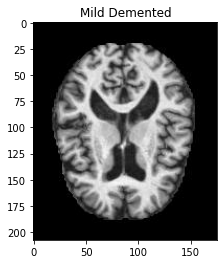

In [11]:
plt.imshow(X_train[124])
plt.title(y_train[124])

finding the count of the 3 labels

In [12]:
value1_count=np.count_nonzero(y_train=='Mild Demented')
value2_count=np.count_nonzero(y_train=='Non Demented')
value3_count=np.count_nonzero(y_train=='Very Mild Demented')

In [13]:
print(value1_count)

700


In [14]:
print(value2_count)

700


In [15]:
print(value3_count)

700


shuffling the images and label dataset

In [16]:
from sklearn.utils import shuffle
X_train_final, y_train_final = shuffle(X_train, y_train, random_state=0)

plotting a random image again for the vibes

Text(0.5, 1.0, 'Very Mild Demented')

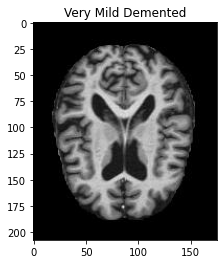

In [17]:
plt.imshow(X_train[1897])
plt.title(y_train[1897])

using a random CNN to try and view accuracy accordingly

In [18]:
# Model building 
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(208,176, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])

2023-02-06 05:19:33.082983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 05:19:33.083947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 05:19:33.211532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 05:19:33.212386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 05:19:33.213193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [19]:
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


summary of the final model used

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 206, 174, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 103, 87, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 101, 85, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30720)             0

splitting into train and validation for modelling

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_final,y_train_final,test_size=0.15, random_state=42)

Label Encoding the model

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

fitting the model to the training and validation image dataset

In [23]:
# Fit the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

2023-02-06 05:19:37.997079: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2023-02-06 05:19:40.139250: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


56/56 [==============================] - 12s 34ms/step - loss: 80.2160 - acc: 0.9305 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/15
56/56 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/15
56/56 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/15
56/56 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/15
56/56 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/15
56/56 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/15
56/56 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/15
56/56 [======================

very accurate model lol

plotting the epoch results accordingly

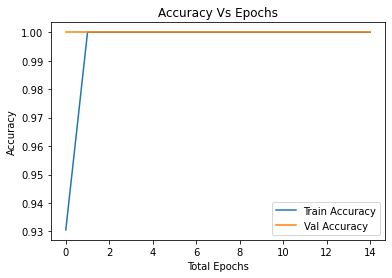

In [24]:
# Accuracy and Loss plot
plt.plot(history.history['acc'], label = 'Train Accuracy')
plt.plot(history.history['val_acc'], label = 'Val Accuracy')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Epochs')
plt.legend()

plotting the loss function

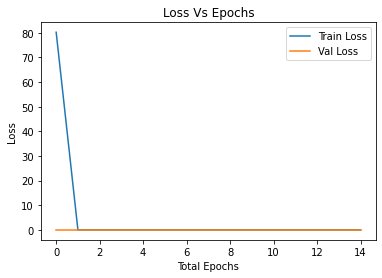

In [25]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Total Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')
plt.legend()

processing some test images

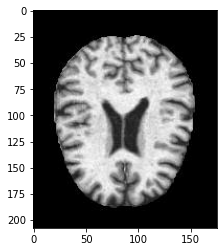

In [26]:
img=cv2.imread('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/VeryMildDemented/26 (49).jpg')
plt.imshow(img)

In [27]:
img=np.stack(img,axis=0)

trying to predict a collection of images in a numpy array

In [28]:
X_test=[]
count=1
folder_path='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/VeryMildDemented'
for filename in os.listdir(folder_path):
  while count<=10:
    #construct the path file
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    if image is not None:
        # add the image to the list as a numpy array
        X_test.append(image)
    count = count + 1

In [29]:
X_test=np.stack(X_test,axis=0)

In [30]:
resized_images=[]
for image in X_test:
    resized = cv2.resize(image, (208, 176), interpolation=cv2.INTER_AREA)
    resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    resized_images.append(resized)

# Convert the resized images list back to a numpy array
resized_images = np.array(resized_images)

In [31]:
pred=model.predict(resized_images)

In [32]:
pred

array([[9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07],
       [9.999999e-01, 1.205512e-16, 1.629818e-07]], dtype=float32)

In [33]:
y_pred = np.argmax(pred,axis=1)

In [34]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
final_pred=encoder.inverse_transform(y_pred)

In [36]:
final_pred

array(['Mild Demented', 'Mild Demented', 'Mild Demented', 'Mild Demented',
       'Mild Demented', 'Mild Demented', 'Mild Demented', 'Mild Demented',
       'Mild Demented', 'Mild Demented'], dtype='<U18')

sex